# An Analysis of Netflix's Movies and TV Shows listings
This project aims to better understand the content available on Netflix.

## Loading Libraries and Cleaning the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Loading the Dataset
netflix_titles = pd.read_csv('data/netflix_titles.csv')

In [3]:
#Country: Some shows have (1) multiple countries and (2) some shows have Nan as values for countries.
#For 1, we will select the first country within the list.
#For 2, we will insert unknown for these shows.
netflix_titles['country'] = netflix_titles['country'].fillna('Unknown')
netflix_titles['country'] = [countries[0] for countries in netflix_titles['country'].str.split(',')]

In [4]:
#Ratings: Some shows have NR and UR ratings which mean the same thing. Standardizing to UR "Unrated"
netflix_titles['rating'] = netflix_titles['rating'].replace('NR','UR')
netflix_titles['rating'] = netflix_titles['rating'].fillna('UR')

In [5]:
#Duration: The duration for TV Shows are in Seasons, but minutes for Movies. Am amending the data to only reflect the Integer from each row.
netflix_titles['duration'] = [int(duration[0]) for duration in netflix_titles['duration'].str.split(' ')]

In [6]:
#Director and Cast: Note that some of cells in the Director, Cast and Date_Added columns are empty, will fill them with Unknown.
netflix_titles['director'] = netflix_titles['director'].fillna('Unknown')
netflix_titles['cast'] = netflix_titles['cast'].fillna('Unknown')

In [7]:
#Date added: Going to fill missing values within Date_Added with Unknown
netflix_titles.date_added.fillna("Unknown",inplace= True)
#Date added: Dont really need to know month and date of when the show was added to their library - lets just focus on year.
netflix_titles["year"]= netflix_titles.date_added.apply(lambda x: str(x).split(",")[-1])


## Exploratory Data Analysis

Netflix is one of the world's leading entertainment services with a market cap of USD 219.37bn, 208 million paid memberships in over 190 countries enjoying TV series, documentaries and feature films across a wide variety of genres and languages. 

Members can watch as much as they want, anytime, anywhere, on any internet-connected screen. Members can play, pause and resume watching, all without commercials or commitments.

But what is on Netflix? 

To better understand this, lets dive into some high level analysis of the dataset obtained from kaggle.com. The dataset contains information on the available title's (1) Name, (2) Type (TV Show or Movie), (3) Director, (4) Cast, (5) Countries involved in the production, (6) Date of availability on Netflix, (7) Original release year, (8) Rating (TV-MA, R, PG-13 etc.), (9) Duration, (10) Genre, and (11) a Brief description of the title.

### Does the Netflix library have more Movies or TV Shows?

Movie      5377
TV Show    2410
Name: type, dtype: int64

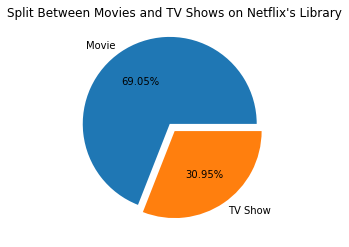

In [8]:
#What is the breakdown of TV Shows and Movies on Netflix?
plt.figure(figsize=(4,4))
plt.pie(netflix_titles['type'].value_counts(),
        labels=netflix_titles['type'].value_counts().index,
        explode=[0.1, 0],
        autopct='%1.2f%%',)
plt.title("Split Between Movies and TV Shows on Netflix's Library");

netflix_titles.type.value_counts()

Based on the available dataset, Netflix's library has 5,377 Movies (69.05%) and 2,410 TV Shows (30.95%).

Its worth nothing however that this dataset is a snapshot taken at a single point in time and as such may not a good representation of how Netflix's library has evolved over time.

That being said, what we can do is perhaps take a deeper look at the dataset's date_added column,to better understand the evolution analysis of the **balance** of TV Shows and Movies within the library.

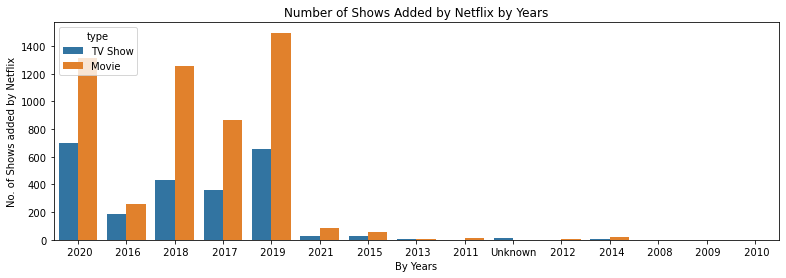

In [9]:
plt.figure(figsize=(13,4)) #Plotting the values obtained above
sns.countplot(x = netflix_titles['year'], hue = netflix_titles['type'])
plt.xlabel('By Years')
plt.ylabel('No. of Shows added by Netflix')
plt.title('Number of Shows Added by Netflix by Years');

Based on the above, the bulk of Netflix's content had been added between 2017-2020 and as illustrated above, the addition of Movies had always been more vs TV Shows.

### What about the age of Netflix's library content?

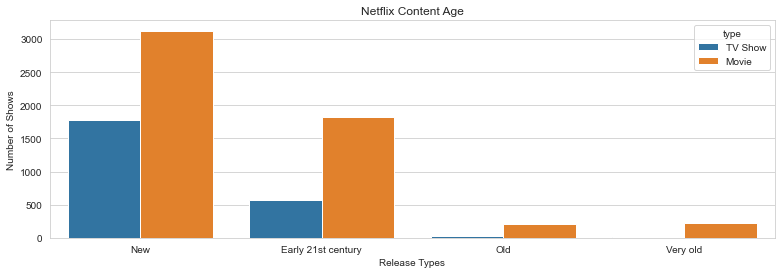

In [10]:
def release(release_date):
    if 1900<=release_date<=1990:
        return 'Very old'
    elif 1990<release_date<=2000:
        return 'Old'
    elif 2000<release_date<=2015:
        return 'Early 21st century'
    elif 2015<release_date<=2021:
        return 'New'
    else:
        return None

netflix_titles['Movie_release_type'] = netflix_titles['release_year'].apply(release)

sns.set_style('whitegrid')
plt.figure(figsize=(13,4))
sns.countplot(x=netflix_titles['Movie_release_type'],hue=netflix_titles['type'])
plt.xlabel('Release Types')
plt.ylabel('Number of Shows')
plt.title('Netflix Content Age');

To better illustrate the age of Netflix's library we have grouped its catalog into 4 categories:-

(1) New: 2015 - 2021

(2) Early 21st Century: 2000 - 2015

(3) Old: 1990 - 2000

(4) Very old: Between 1960 - 1990

Based on the ranges above, it is apparent that the bulk of Netflix's content was released in the period of 2000-2021 so **pretty up to date!**.

### What are the three earliest and latest shows on the catalog?

In [11]:
a=[]
b=[]
c=[]

df=netflix_titles['release_year'].sort_values(ascending=True)[:3].to_frame()

for i in df.index:
    a.append(netflix_titles['release_year'].iloc[i])   #Using iloc to obtain corresponding values of a column using the value's index.
    b.append(netflix_titles['title'].iloc[i])
    c.append(netflix_titles['type'].iloc[i])
df2=pd.DataFrame(data={'Release year':a,'Title':b, 'Type':c},index=[1,2,3])   #Creating a dataframe from the values obtained.
df2

,Release year,Title,Type
1,1925,Pioneers: First Women Filmmakers*,TV Show
2,1942,The Battle of Midway,Movie
3,1942,Prelude to War,Movie


**Earliest:** A TV Show called *Pioneers: First Women Filmmakers*

In [12]:
d=[]
e=[]
f=[]
df=netflix_titles['release_year'].sort_values(ascending=False)[:3].to_frame()
for i in df.index:
    d.append(netflix_titles['release_year'].iloc[i])
    e.append(netflix_titles['title'].iloc[i])
    f.append(netflix_titles['type'].iloc[i])
df3=pd.DataFrame(data={'Release year':d,'Title':e, 'Type':f},index=[1,2,3])
df3

,Release year,Title,Type
1,2021,Night Stalker: The Hunt for a Serial Killer,TV Show
2,2021,Charming,Movie
3,2021,Bling Empire,TV Show


**Latest:** A TV Show called *Night Stalker: The Hunt for a Serial Killer*

### What about the ratings of these movies? What is Netflix's target demographic?

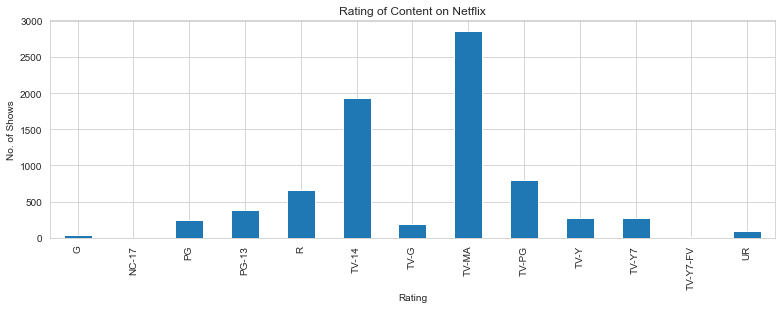

In [13]:
plt.figure(figsize=(13,4))
netflix_titles['rating'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Rating')
plt.ylabel('No. of Shows')
plt.title('Rating of Content on Netflix');

From the above, a couple of points are apparent:-
* The Top (1st) Rating: TV-MA: *These programs are intended to be viewed by mature, adult audiences and may be unsuitable for children under 17.*
* The Second (2nd) Highest Rating: TV-14: *These programs may be unsuitable for children under 14 years of age.*
* The Third (3rd) Highest Rating: TV-PG *This program contains material that parents may find unsuitable for younger children. Parental guidance is recommended.*

However, given the high number of Rating types, to better illustrate Netflix's target demographics we have categorized them further into four main categories:- 

(1) Adult focused:'R', 'NC-17', 'TV-MA' 

(2) Teens focused: 'PG-13', 'TV-14'

(3) Kids friendly: 'TV-Y', 'TV-Y7', 'TV-Y7-FV', 'G', 'TV-G', 'PG', 'TV-PG'

(4) Unrated: Not rated

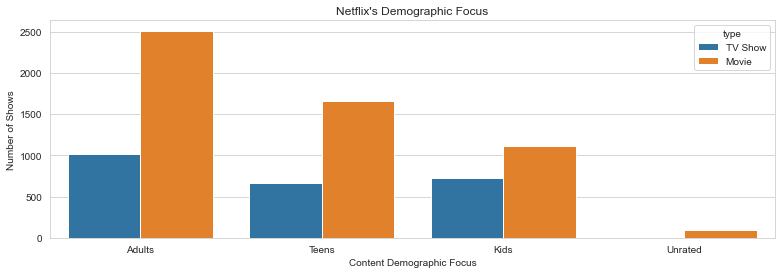

In [14]:
def group_by_rating(rating):
    if rating in ['TV-Y', 'TV-Y7', 'TV-Y7-FV', 'G', 'TV-G', 'PG', 'TV-PG']:
        new_ratin_group = 'Kids'
    elif rating in ['PG-13', 'TV-14']:
        new_ratin_group = 'Teens'
    elif rating in ['R', 'NC-17', 'TV-MA']:
        new_ratin_group = 'Adults'
    else:
        new_ratin_group = 'Unrated'
    return new_ratin_group 
    
netflix_titles['Show_rating'] = netflix_titles['rating'].apply(group_by_rating)

sns.set_style('whitegrid')
plt.figure(figsize=(13,4))
sns.countplot(x=netflix_titles['Show_rating'],hue=netflix_titles['type'])
plt.xlabel('Content Demographic Focus')
plt.ylabel('Number of Shows')
plt.title("Netflix's Demographic Focus");

Based on the above, it is apparent that **most of the content on Netflix's library are for Adults**.

### But what genres are these contents? What has Netflix focused on when adding to their library?

In [15]:
movie_genre=[]
for i in range(netflix_titles["listed_in"].shape[0]):
    if netflix_titles["type"][i]=="Movie":
        a=str(netflix_titles["listed_in"][i]).split(",")
        for b in range(len(a)):
            a[b]=a[b].lstrip()
        movie_genre+=a
top_movie_genre=pd.Series(movie_genre)
top_movie_genre.value_counts().head(5)

International Movies    2437
Dramas                  2106
Comedies                1471
Documentaries            786
Action & Adventure       721
dtype: int64

The top three (3) Movies by genres on Netflix's library is as follows:- 
* 1st: International Movies
* 2nd: Dramas
* 3rd: Comedies

In [16]:
#top 5 TV Shows genres on netflix on the basis of their appearance
tv_genre=[]
for i in range(netflix_titles["listed_in"].shape[0]):
    if netflix_titles["type"][i]=="TV Show":
        a=str(netflix_titles["listed_in"][i]).split(",")
        for b in range(len(a)):
            a[b]=a[b].lstrip()
        tv_genre+=a
top_tv_genre=pd.Series(tv_genre)
top_tv_genre.value_counts().head(5)

International TV Shows    1199
TV Dramas                  704
TV Comedies                525
Crime TV Shows             427
Kids' TV                   414
dtype: int64

The top three (3) TV Shows by genres on Netflix's library is as follows:- 
* 1st: International TV Shows
* 2nd: TV Dramas
* 3rd: TV Comedies

**Content strategy appears to be consistent for both Movies and TV Shows**

### Where does Netflix get their Content from?

In [17]:
print('Top 10 Movie Creators:')
print(netflix_titles.groupby('type').country.value_counts()['Movie'][:10])

Top 10 Movie Creators:
country
United States     2100
India              883
United Kingdom     341
Unknown            230
Canada             175
France             137
Spain              119
Egypt               93
Mexico              79
Turkey              78
Name: country, dtype: int64


Top 5 countries when it comes to availability and creation of movies:- **USA, India, UK, Cananda, France**

In [18]:
print('Top 10 TV Show Creators:')
print(netflix_titles.groupby('type').country.value_counts()['TV Show'][:10])

Top 10 TV Show Creators:
country
United States     783
Unknown           277
United Kingdom    236
Japan             162
South Korea       152
Canada             84
India              73
Taiwan             70
France             59
Australia          52
Name: country, dtype: int64


Top 5 countries when it comes to availability and creation of TV Shows:- **USA, UK, Japan, South Korea, Canada**

The above could be an indicator of Netflix's target geography. The bulk of Netflix's users are likely English speakers.

## How long are the Movies and TV Shows on Netflix?

From a Movies Perspective.

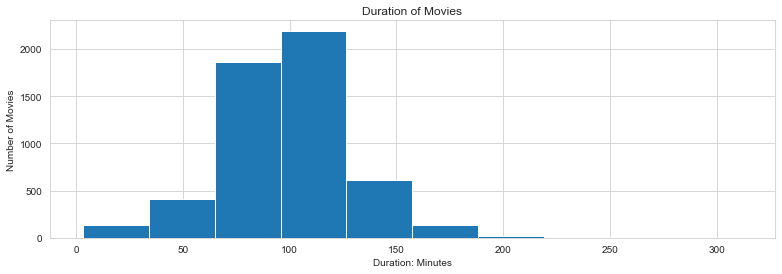

In [19]:
plt.figure(figsize=(13,4))
netflix_titles[netflix_titles.type=='Movie']['duration'].plot(kind='hist')
plt.ylabel('Number of Movies')
plt.xlabel('Duration: Minutes')
plt.title('Duration of Movies');

Based on the dataset and as illustrated within the graph above, the minimum runtime for a Netflix Movie is **3 minutes**, the average is **99.3 minutes** and the maximum is **312 minutes**.

The top three (3) longest run time movies are as per below.

In [20]:
netflix_titles[netflix_titles.type=='Movie'].sort_values(by='duration', ascending=False).head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year,Movie_release_type,Show_rating
957,s958,Movie,Black Mirror: Bandersnatch,Unknown,"Fionn Whitehead, Will Poulter, Craig Parkinson...",United States,"December 28, 2018",2018,TV-MA,312,"Dramas, International Movies, Sci-Fi & Fantasy","In 1984, a young programmer begins to question...",2018,New,Adults
6850,s6851,Movie,The School of Mischief,Houssam El-Din Mustafa,"Suhair El-Babili, Adel Emam, Saeed Saleh, Youn...",Egypt,"May 21, 2020",1973,TV-14,253,"Comedies, Dramas, International Movies",A high school teacher volunteers to transform ...,2020,Very old,Teens
4490,s4491,Movie,No Longer kids,Samir Al Asfory,"Said Saleh, Hassan Moustafa, Ahmed Zaki, Youne...",Egypt,"May 21, 2020",1979,TV-14,237,"Comedies, Dramas, International Movies",Hoping to prevent their father from skipping t...,2020,Very old,Teens


From a TV Show prespective.

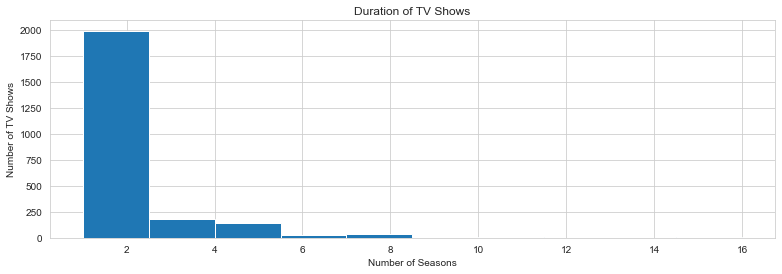

In [21]:
plt.figure(figsize=(13,4))
netflix_titles[netflix_titles.type=='TV Show']['duration'].plot(kind='hist')
plt.ylabel('Number of TV Shows')
plt.xlabel('Number of Seasons')
plt.title('Duration of TV Shows');

Based on the dataset and as illustrated within the graph aboce, the minimum Season for a Netflix TV Show is **1 season**, the average is **1.78 seasons** and the maximum is **16 seasons**.

In [22]:
netflix_titles[netflix_titles.type=='TV Show'].sort_values(by='duration', ascending=False).head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year,Movie_release_type,Show_rating
2538,s2539,TV Show,Grey's Anatomy,Unknown,"Ellen Pompeo, Sandra Oh, Katherine Heigl, Just...",United States,"May 9, 2020",2019,TV-14,16,"Romantic TV Shows, TV Dramas",Intern (and eventual resident) Meredith Grey f...,2020,New,Teens
4438,s4439,TV Show,NCIS,Unknown,"Mark Harmon, Michael Weatherly, Pauley Perrett...",United States,"July 1, 2018",2017,TV-14,15,"Crime TV Shows, TV Dramas, TV Mysteries",Follow the quirky agents of the NCIS – the Nav...,2018,New,Teens
5912,s5913,TV Show,Supernatural,Phil Sgriccia,"Jared Padalecki, Jensen Ackles, Mark Sheppard,...",United States,"June 5, 2020",2019,TV-14,15,"Classic & Cult TV, TV Action & Adventure, TV H...","Siblings Dean and Sam crisscross the country, ...",2020,New,Teens


## Who are the most popular directors Netflix has onboarded for their content?

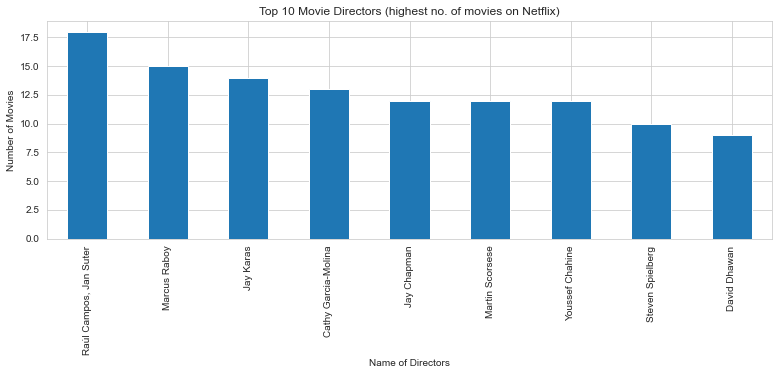

In [23]:
plt.figure(figsize=(13,4))
netflix_titles.groupby('type').director.value_counts()['Movie'][1:10].plot(kind='bar') #removed unknowns
plt.ylabel('Number of Movies')
plt.xlabel('Name of Directors')
plt.title('Top 10 Movie Directors (highest no. of movies on Netflix)');

Raul Campos and Jan Suter are the top 2 Directors who have directed the most Movies available on Netflix.

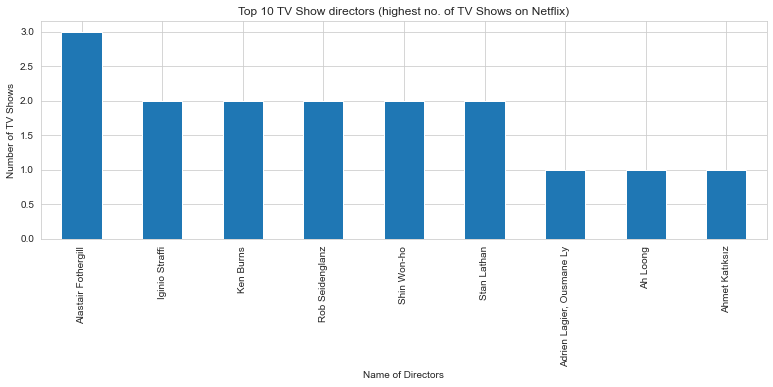

In [24]:
plt.figure(figsize=(13,4))
netflix_titles.groupby('type').director.value_counts()['TV Show'][1:10].plot(kind='bar') #removed unknowns
plt.ylabel('Number of TV Shows')
plt.xlabel('Name of Directors')
plt.title('Top 10 TV Show directors (highest no. of TV Shows on Netflix)');

Alastair Fothergill is the top Directors who have directed the most TV Shows available on Netflix.

## A quick summary consolidating all that we've been able to dig up above.

(1) Netflix has about 2x the amount of Movies vs TV Shows which is reflected by the number of content added by Netflix over the years.

(2) The bulk of its content had been added pretty recently (2017 - 2021) with the focus being on Content produced from the 2000 - 2021.
* The earliest being a TV Show called "Pioneers: First Women Filmmakers" released in 1925.
* The latest bring a TV Show called "Night Stalker: The Hunt for a Serial Killer" released in 2021.

(3) Netflix's user demographic appears to be more adult centric as the majority of its content are TV-MA rated followed by TV-14 and lastly TV-PG rounding up top 3. Likely because the adults are paying the bills.

(4) From a genre perspective, content strategy appears to be consistent for both Movies and TV Shows with top content being within the (1) International, (2) Dramas, and (3) Comedies categories.

(5) The top contributors of Movies are the USA, India and UK; for TV Shows, the USA, UK and Japan. So safe to assume the bulk of its content are focused on English speaking users.

(6) From a duration perspective, the average Movie on Netflix is around 1 hour and 40 minutes and the average TV Show lasts just under 2 Seasons.
* The longest running Movie being "Black Mirror: Bandersnatch" at 312 minutes!
* The longest running TV Show being "Grey's Anatomy" at 16 Seasons!

(7) Raul Campos and Jan Suter are the top 2 Directors who have directed 18 Movies available on Netflix (mostly Stand-up Comedies). Alastair Fothergill, who produces mainly documentaries is the top Directors who have directed 3, TV Shows available on Netflix.